# Tercer problema de DAA: La Pregunta
*Equipo: pss pss | Gabriel Hernández Rodríguez C411*

## Texto Original

Estaba Karlos pasando (tal vez perdiendo) el tiempo cuando viene Karel y le hace una pregunta. Karlos quería responder que "no" a la pregunta, pero Karel le dijo que no era tan fácil, que la respuesta a esa pregunta iba a depender de un conjunto de pequeñas preguntas de "si" o "no" que este tenía. Luego, con las respuestas a esas preguntas de "si" o "no" armó una expresión booleana conformada por negaciones, expresiones "and", expresiones "or" e implicaciones de las pequeñas preguntas. La respuesta de la pregunta grande dependería de la expresión booleana que a la vez dependía de las pequeñas preguntas. Ayude a Karlos a encontrar si existe una distribución de respuestas a las pequeñas preguntas que le permitan responder que "no" a la pregunta grande.

## Orientación Concreta

Dada una expresión booleana conteniendo operaciones de negación, "and", "or" y de implicación. Se debe saber si existe una combinación de valores Verdadero o Falso asignado a cada una de las variables de forma que la expresión en su totalidad de Falso.

## Análisis como problema NP-completo



El problema es NP-completo, es decir, este problema es NP y a su vez NP-hard.

Primero, se demuestra que el problema está en NP. Un problema está en NP si, dado un "certificado" (en este caso, una asignación de valores de verdad a las variables), se puede verificar en tiempo polinomial que este certificado resuelve el problema. En este problema, dada una asignación de valores de verdad a las variables, se puede evaluar la expresión booleana en tiempo polinomial para verificar si la expresión es Falsa. Por lo tanto, está en NP.

Luego, se necesita demostrar que el problema es NP-hard. Para esto, se toma un problema que ya se sabe que es NP-completo y demostrar que cualquier instancia de ese problema se puede reducir en tiempo polinomial a una instancia de este problema. Si podemos hacer esto, entonces tu problema es al menos tan difícil como el problema de SAT, y por lo tanto es NP-difícil. 

El problema de SAT es un problema NP-completo fácilmente reducible a este problema: se toma cualquier expresión booleana $\textbf{E}$ instancia del problema de SAT y creamos una nueva expresión $\textbf{E}'$ que es la negación de $\textbf{E}$ . Esta transformación se puede realizar en tiempo polinomial (en realidad, en tiempo lineal en el tamaño de $\textbf{E}$  ya que basta con recorrer cada operación y cada variable a lo sumo una vez para negarlas). Luego, cualquier asignación de variables que no satisfaga $\textbf{E}'$ (es decir, haga que $\textbf{E}'$ sea Falsa) es una asignación que hace que $\textbf{E}$ sea Verdadera. Por lo tanto, cualquier instancia del problema de SAT puede ser reducida.

Luego el problema es NP-completo por ser NP y NP-hard.

## Definición de la instancia del problema

Se considera una instancia del problema cualquier expresión que cumpla con lo mencionado en el texto de este, ahora se hace especial distinción sobre expresiones que se encuentran en forma normal disyuntiva y se resuelven de manera independiente, esto se debe a que en el problema SAT es común presentar la entrada en forma normal conjuntiva(*CNF*), así que se asume que la entrada de este se presenta así. Se diferencian estos casos ya que según el formato de la entrada se pueden realizar distintas soluciones y reducir una expresión a forma normal es en si un problema con complejidad temporal exponencial.

En el archivo de código que se importa a continuación se define haciendo uso de la librería `sympy` la estructura de una instancia del problema, la cual se compone de un árbol de expresiones booleanas.

In [8]:
from question.formula import QuestionInput

Para la reducción del problema SAT a este problema, al asumir que se encuentra en forma normal conjuntiva (*CNF*), simplemente se realiza una negación de la fórmula y se obtiene una forma normal disyuntiva.

In [9]:
from question.reduction import from_sat_input

Esta negación es a lo sumo $O(m+n)$ donde $m$ es la cantidad de operaciones en la expresión y $n$ la cantidad de variables, por tanto es lineal y como se mencionaba anteriormente polinomial.

Como el problema actual devuelve Verdadero si existe una combinación de valores que **no satisface** la expresión booleana de entrada, si esa expresión de entrada es resultado de negar una expresión booleana inicial que es entrada del problema SAT, entonces el problema devuelve Verdadero si existe una combinación de valores que **satisface** la expresión booleana de entrada del SAT, y por tanto la salida es directamente la solución del problema SAT.

## Solución Básica del Problema

La solución básica propuesta para el problema es simplemente probar cada combinación posible de valores de verdad para las variables de la expresión de entrada y evaluar esta en cada uno de esos valores. Dadas $n$ variables y $m$ operaciones que se realizan en la expresión de entrada, la complejidad de evaluar la expresión en una combinación de valores es $O(m)$ y la de recorrer cada una de las posibles combinaciones de valores de verdad es $O(2^n)$, por tanto, la complejidad de esta solución en su totalidad es de $O(2^nm)$.

Tanto para las soluciones de este problema como las de SAT que se presentan, el formato de la salida es una lista $L$, que representa una solución $V'={x_1,x_2,\ldots,x_n}$ del problema tal que $\forall x_{i}$ debe tener valor de verdad: *Verdadero* si $i\in L$, *Falso* si $-i\in L$. Por ser solución del problema se entiende: en el caso del SAT, dada una expresión $\textbf{E}$ de entrada, $V'$ es solución si $\textbf{E}(V')=Verdadero$, y en caso del problema actual si $\textbf{E}'(V')=Falso$ siendo $\textbf{E}'$ la expresión de entrada.

In [10]:
from question.solvers.basic import solve as basic_solve

## Generación de inputs para prueba

Para evaluar que efectivamente la reducción del problema SAT al actual es correcta se utilizan dos generadores de expresiones CNF para SAT que se evalúan con un solucionador de SAT y además se reducen al problema actual para usar un solucionador de este y comprobar que ambos resultados coinciden.

Estos dos generadores son:
- `generate_hard_sat`: El cual utiliza facilidades de la librería PySAT para generar expresiones ya conocidas y usadas comúnmente en el estudio del problema SAT. Contiene un número finito de fórmulas, específicamente 11. Esto se debe a que, debido a la velocidad de los solucionadores, las fórmulas que se utilizan para probar no deberían exceder las 19 variables. Todas estas fórmulas son no satisfacibles.
- `generate_custom_NF`: Este generador, dada la cantidad de variables `n` y la cantidad máximade cláusulas `m` genera fórmulas CNF de manera aleatoria.

Además de estos generadores se definen otros dos generadores que crean instancias de el problema actual(La Pregunta) directamente. Estos son:
- `generate_tree`: Dada la cantidad de variables `n`, genera un árbol de expresiones booleanas aleatorio como entrada del problema.
- `generate_custom_NF`: Dada la cantidad de variables `n`, y la cantidad máxima de cláusulas `m` genera una expresión DNF como entrada del problema.

Todos estos generadores forman parte del sistema de prueba de soluciones. Dos generadores se llaman igual y son exactamente el mismo código, pero se diferencian por su función, una es para generar expresiones CNF para SAT y otra generar expresiones DNF para este problema, es el mismo código ya que ambas poseen el mismo formato y características similares.

In [11]:
from question.generation import generate_hard_sat, generate_custom_NF, generate_tree


## Pruebas de Reducción

In [12]:
#=========================================================================
#= A continuación se prueba la reducción del problema SAT a La Pregunta
#=========================================================================

# Para resolver SAT y comprobar que la respuesta es correcta se utiliza
# un solucionador ya comprobado
from question.solvers.sat import mini_sat_solve

# Primero las fórmulas de PySAT
# for i in range(11):
#     test=(generate_hard_sat(i))
    
#     # Solve
#     sol=mini_sat_solve(test)
#     # Reduce and solve
#     res=basic_solve(from_sat_input(test))
    
#     print(f'CNF: {test.clauses}\n\t:: Reduction solution: {res}\n\t:: Minisat solution: {sol}')
    
#     assert sol==False and res==False
    
# Luego fórmulas generadas aleatoriamente. Con 5,8 y 12 variables, 
# con a lo sumo 10,20 y 80 cláusulas respectivamente. En cada una de estas
# combinaciones se evalúan 15 expresiones aleatorias.
CUSTOM_REDUC_PARAMS=[
    (5,24),
    (8,100),
    (12,200)
]
# for params in CUSTOM_REDUC_PARAMS:
#     for i in range(15):
#         test=(generate_custom_NF(*params))

#         # Solve
#         sol=mini_sat_solve(test)
#         # Reduce and solve
#         res=basic_solve(from_sat_input(test))



#         assert not((sol==False)^(res==False))
                                
#     print(f'Terminado de evaluar con las expresiones de {params[0]} variables.')


## Otras soluciones

In [17]:
#=========================================================================
#= A continuación se prueba la solución de búsqueda local de La Pregunta
#=========================================================================
import time
from question.solvers.search import solve as search_solve

# Genera fórmulas DNF aleatorias
CUSTOM_DNF_PARAMS=[
    (5,24),
    (8,100),
    (12,200)
]

bench={
    'Búsqueda(1000,80)':{},
    'Búsqueda(500,50)':{},
    'Búsqueda(400,10)':{},
    'Básica':{}
    
}

errors={
    'Búsqueda(1000,80)': 0,
    'Búsqueda(500,50)': 0,
    'Búsqueda(400,10)': 0
}

for params in CUSTOM_DNF_PARAMS:
    for k in bench.keys():
        bench[k][params[0]]=[]
    for i in range(12):
        # Aquí se asume que la fórmula generada es un DNF entrada de
        # este problema, en lugar de un CNF entrada de SAT
        test=(generate_custom_NF(*params))
        
        # Solución básica
        start=time.time()
        bas=basic_solve(QuestionInput.from_clauses(test))
        end=time.time()
        
        bench['Básica'][params[0]].append(end-start)
        
        # Solución por búsqueda con 1000 iteraciones máximo y 80
        # iteraciones locales máximo (default)
        start=time.time()
        sch1=search_solve(QuestionInput.from_clauses(test))
        end=time.time()
        
        errors['Búsqueda(1000,80)']+=int(not((bas==False)^(sch1==False)))
        
        bench['Búsqueda(1000,80)'][params[0]].append(end-start)
        
        # Solución por búsqueda con 500 iteraciones máximo y 50
        # iteraciones locales máximo
        start=time.time()
        sch2=search_solve(QuestionInput.from_clauses(test), max_iter=500, max_iter_local=50)
        end=time.time()
        
        errors['Búsqueda(500,50)']+=int(not((bas==False)^(sch2==False)))
        
        bench['Búsqueda(500,50)'][params[0]].append(end-start)
        
        # Solución por búsqueda con 400 iteraciones máximo y 10
        # iteraciones locales máximo
        start=time.time()
        sch3=search_solve(QuestionInput.from_clauses(test), max_iter=400, max_iter_local=10)
        end=time.time()
        
        errors['Búsqueda(400,10)']+=int(not((bas==False)^(sch3==False)))
        
        bench['Búsqueda(400,10)'][params[0]].append(end-start)
        
        print(f'\n::{bas}\n::{sch1}\n::{sch2}\n::{sch3}\n')
    print(f'Terminado de evaluar con las expresiones de {params[0]} variables.')
    print(errors)
        


::[False, False, True, True, False]
::False
::False
::False


::[True, True, True, True, True]
::False
::False
::False


::False
::False
::False
::False


::[True, True, False, False, False]
::False
::False
::False


::False
::False
::False
::False


::False
::False
::False
::False


::[True, True, True, True, False]
::False
::False
::False


::[False, False, True, False, False]
::False
::False
::False


::[True, True, False, True, True]
::False
::False
::False


::[True, False, False, False, True]
::False
::False
::False


::[True, True, True, True, False]
::False
::False
::False


::False
::False
::False
::False

Terminado de evaluar con las expresiones de 5 variables.
{'Búsqueda(1000,80)': 4, 'Búsqueda(500,50)': 4, 'Búsqueda(400,10)': 4}

::[True, True, True, True, False, False, False, True]
::False
::False
::False


::[True, True, True, True, True, True, False, True]
::False
::False
::False


::[True, True, True, True, True, True, True, True]
::False
::False
::False


::[True, Tru

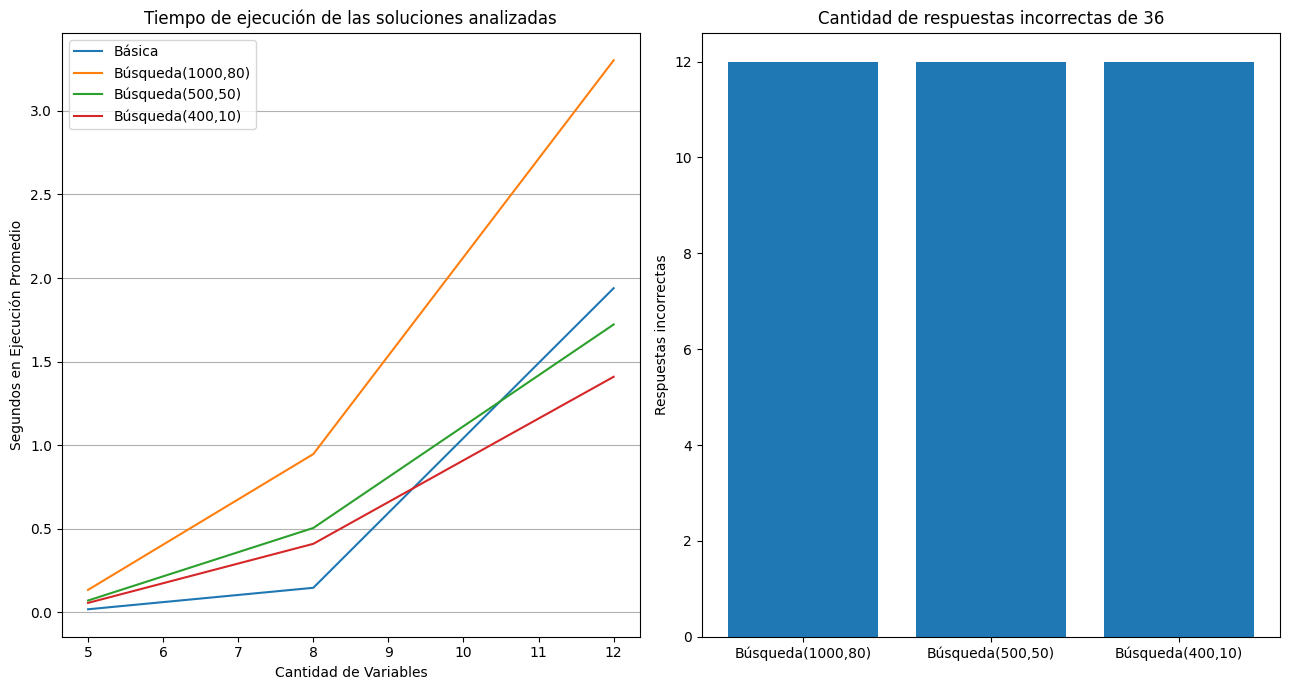

In [14]:
from question.util import plot_benchmark

plot_benchmark(bench,errors)
        